# ML Zoomcamp HW Week 2

## California House Price Prediction

### Fetching the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### EDA

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

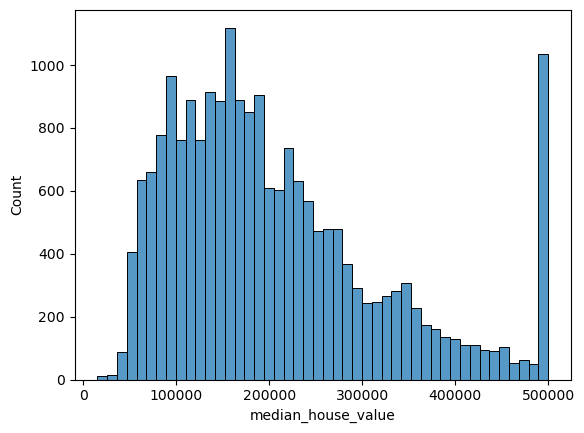

In [4]:
sns.histplot(df.median_house_value)
plt.show()

Although, the tail is not long, but the median_house_value has some values at the higher end which gives it a small tail.

### Preparing the Dataset

We will only use a subset of the data.

For this, we will only keep records where 'ocean_proximity' is either '<1H OCEAN' or 'INLAND'.

Next, we use only the following columns:

- 'latitude',
- 'longitude',
- 'housing_median_age',
- 'total_rooms',
- 'total_bedrooms',
- 'population',
- 'households',
- 'median_income',
- 'median_house_value'


In [5]:
df_subset = df[(df['ocean_proximity'] == '<1H OCEAN') 
              | (df['ocean_proximity'] == 'INLAND')]
df_subset.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [6]:
req_columns = ['latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value']

In [7]:
df_subset = df_subset[req_columns]
assert list(df_subset.columns) == req_columns

In [8]:
df_subset.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


### Missing values

In [9]:
df_subset.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

We can see that 'total_bedrooms' has 157 missing values.

### Descriptive Statistics

In [10]:
# Lets check the median percentile for variable 'population'

df_subset.population.median()

1195.0

The median population is 1195. 
One good thing about median is that it is not influenced by outliers.

### Split the dataset and preparation

In [11]:
def prepare_data(df, 
                 val_size: float, 
                 test_size: float, 
                 transform = False, 
                 target:str = None):
    # Number of obsevations
    
    n = len(df)
    
    # Train, validation and test sizes
    
    n_val = int(val_size*n)
    n_test = int(test_size*n)
    n_train = n - (n_val+n_test)
    
    # Generate Randomness
    
    np.random.seed(42)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # Get train, validation and test dataframes
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    # reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # Apply log transformation if transform is True
    if transform:
        y_train = np.log1p(df_train[target].values)
        y_val = np.log1p(df_val[target].values)
        y_test = np.log1p(df_test[target].values)
      
    # Drop the target variable from feature set
    del df_train[target]
    del df_val[target]
    del df_test[target]
    
    return df_train, df_val, df_test, y_train, y_val, y_test 

In [12]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data(df_subset, 
                                         val_size=0.2, 
                                         test_size=0.2, 
                                         transform=True, 
                                         target='median_house_value')

In [13]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875
1,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125
2,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301
3,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422
4,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306


In [14]:
df_val.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,37.02,-120.09,9.0,1608.0,297.0,1057.0,295.0,3.7143
1,33.84,-117.88,34.0,1410.0,214.0,837.0,240.0,6.1168
2,33.95,-118.21,32.0,1116.0,328.0,1265.0,302.0,2.2950
3,36.32,-119.32,29.0,2409.0,436.0,1142.0,440.0,3.6895
4,33.14,-117.11,10.0,3208.0,636.0,1395.0,582.0,3.4455


In [15]:
df_test.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,33.90,-117.44,23.0,4487.0,754.0,2609.0,778.0,4.2788
1,38.03,-121.65,28.0,3144.0,694.0,1095.0,482.0,3.4402
2,37.25,-121.85,20.0,3773.0,624.0,1965.0,607.0,5.4939
3,32.78,-116.97,35.0,1113.0,236.0,681.0,246.0,2.9784
4,37.97,-121.32,43.0,2453.0,490.0,1093.0,438.0,2.9107


In [16]:
y_train[:5]

array([11.16196275, 12.32163544, 12.4718963 , 12.35922712, 12.57453139])

In [17]:
y_val[:5]

array([11.3095968 , 12.27326857, 11.95247633, 11.38168858, 12.15741272])

In [18]:
y_test[:5]

array([11.90969286, 12.16733701, 12.39338589, 11.82335436, 11.39415319])

### Training

Since we have missing values in our dataset, we need to impute the missing values. We will try two different options:

1. Use 0 - This will mean that the features is not present in the observation
2. Use Mean - This will enable the observation to contribute to the weights. However, we will only use the mean from training set.

In [19]:
def prepare_X(df, impute_value):
    df = df.copy()
    df = df.fillna(impute_value)
    X = df.values
    return X

In [20]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [21]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [22]:
X_train_0 = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train_0, y_train)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
score = round(rmse(y_val, y_pred), 2)
print(f"RMSE for replacing missing values with 0:\n{score}")

RMSE for replacing missing values with 0:
0.34


In [23]:
X_train_mean = prepare_X(df_train, df_train['total_bedrooms'].mean())
w0, w = train_linear_regression(X_train_mean, y_train)

X_val = prepare_X(df_val, df_train['total_bedrooms'].mean())
y_pred = w0 + X_val.dot(w)
score = round(rmse(y_val, y_pred), 2)
print(f"RMSE for replacing missing values with mean:\n{score}")

RMSE for replacing missing values with mean:
0.34


Both the models produce same scores upto 2 decimal places.

### Regularization

We will now try and see if we can further improve the score by regularizing the feature matrix.

In [24]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [25]:
tuners = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in tuners:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    print(r, w0, score)

0 -9.763249478171275 0.34
1e-06 -9.763228831248666 0.34
0.0001 -9.761185235963925 0.34
0.001 -9.742646249611582 0.34
0.01 -9.56105619314681 0.34
0.1 -8.058889769683878 0.34
1 -3.133154278521172 0.34
5 -0.8410867975386854 0.35
10 -0.43811723153415977 0.35


As we can see that with regularization we do not have any improvement in scores. Hence, we can select the lowest value of r with similar scores to without regularization. 

Hence we select 'r=0.000001'.

Now, we can also try to change the split the models differently and see how the model performance varies.

In [39]:
def prepare_data_seed(df, 
                 val_size: float, 
                 test_size: float, 
                 transform = False, 
                 target:str = None,
                 random_seed: int = None):
    # Number of obsevations
    
    n = len(df)
    
    # Train, validation and test sizes
    
    n_val = int(val_size*n)
    n_test = int(test_size*n)
    n_train = n - (n_val+n_test)
    
    # Generate Randomness
    
    np.random.seed(random_seed)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # Get train, validation and test dataframes
    
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    # reset index
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # Apply log transformation if transform is True
    if transform:
        y_train = np.log1p(df_train[target].values)
        y_val = np.log1p(df_val[target].values)
        y_test = np.log1p(df_test[target].values)
      
    # Drop the target variable from feature set
    del df_train[target]
    del df_val[target]
    del df_test[target]
    
    return df_train, df_val, df_test, y_train, y_val, y_test 

In [35]:
def prepare_X(df):
    df = df.copy()
    df = df.fillna(0)
    X = df.values
    return X

In [41]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [44]:
scores = []
for seed in seeds:
    df_train, df_val, df_test, y_train, y_val, y_test = prepare_data_seed(df_subset, 
                                         val_size=0.2, 
                                         test_size=0.2, 
                                         transform=True, 
                                         target='median_house_value', 
                                         random_seed=seed)
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = round(rmse(y_val, y_pred), 2)
    scores.append(score)
    

In [45]:
scores

[0.34, 0.34, 0.34, 0.33, 0.34, 0.34, 0.34, 0.35, 0.35, 0.33]

In [46]:
std = np.std(scores)

In [47]:
round(std, 3)

0.006

We see that the standard deviation is quite low, which indicates that our model is quite stable. Also, a random_state of 9 seems to be the best model with lowest RMSE.

### Predictions on Test Set

Here we will proceed with creating a model that trains on a larger dataset, namely combining, train and validation datasets and check the accuracy in prediction on the test set.

In [48]:
df_train, df_val, df_test, y_train, y_val, y_test = prepare_data_seed(df_subset, 
                                         val_size=0.2, 
                                         test_size=0.2, 
                                         transform=True, 
                                         target='median_house_value', 
                                     random_seed=9)

In [49]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)

X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

In [52]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = round(rmse(y_test, y_pred), 2)
print(score)

0.33


### Conclusion

Hence, we see that our model generalizes quite well over unseen data as well as the score is constant across training, validation and test datasets.